In [102]:
import numpy as np
import matplotlib.pyplot as plt
import sklearn as sk
from sklearn.linear_model import LinearRegression

In [103]:
def sim_r2(n):
    x=np.random.randn(n).reshape(-1, 1)
    y=[1 + np.random.randn() + v for v in x]
    model = LinearRegression()
    model.fit(x,y) ##
    r2_score=sk.metrics.r2_score(y,model.predict(x))
    return r2_score

In [104]:
rep=10**6
r_2_mean=np.array([])
r_2_q5=np.array([])
r_2_q95=np.array([])

size=200

for s in range(10,size+10,10):
    result = np.array([sim_r2(s) for _ in range(1,rep)])
    r_2_mean = np.append(r_2_mean,result.mean())
    r_2_q5 =  np.append(r_2_q5,np.quantile(result,0.05))
    r_2_q95 = np.append(r_2_q95,np.quantile(result,0.95))
print("Done")

Done


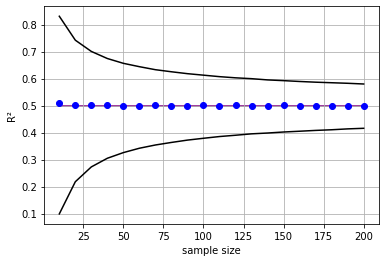

In [123]:
plt.grid(True)
plt.scatter(np.arange(10,size+10,10), r_2_mean,c="blue",zorder=2)
plt.plot(np.arange(10,size+10,10), r_2_q5,color="black")
plt.plot(np.arange(10,size+10,10), r_2_q95,color="black")
plt.plot(np.arange(10,size+10,10),0.5*np.ones(20),c='purple',zorder=1)

plt.xlabel("sample size")
plt.ylabel("R²")
plt.show()

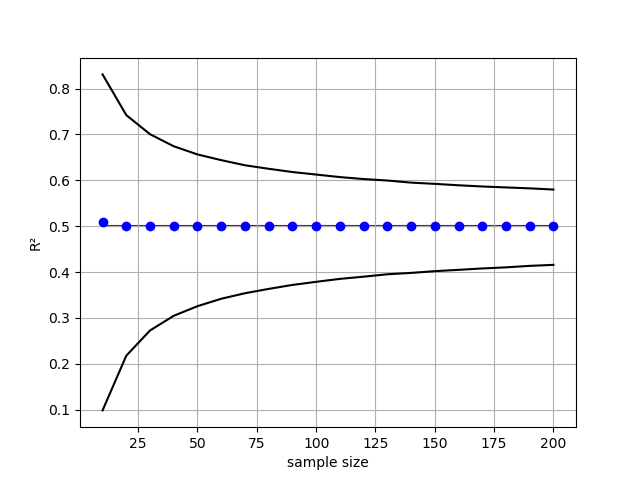

In [106]:
def sim_r2_k(n,k):
    x = np.random.randn(n,k)
    y = [np.sum(x[i,:]) for i in range(0,n)]
    y = y + np.random.randn(n)
    model = LinearRegression()
    model.fit(x,y) ##
    r2_score=sk.metrics.r2_score(y,model.predict(x))
    return r2_score

In [107]:
rep=10**6
r_2_k_mean=np.array([])
r_2_k_q5=np.array([])
r_2_k_q95=np.array([])
size=200
for s in range(10,size+10,10):
    result = np.array([sim_r2_k(s,9) for _ in range(1,rep)])
    r_2_k_mean = np.append(r_2_k_mean,result.mean())
    r_2_k_q5 =  np.append(r_2_k_q5,np.quantile(result,0.05))
    r_2_k_q95 = np.append(r_2_k_q95,np.quantile(result,0.95))
print("Done")

Done


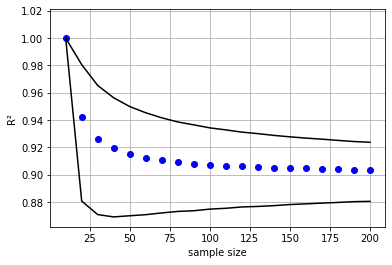

In [108]:
plt.grid(True)
plt.scatter(np.arange(10,size+10,10), r_2_k_mean,c="blue",zorder=2)
plt.plot(np.arange(10,size+10,10), r_2_k_q5,color="black")
plt.plot(np.arange(10,size+10,10), r_2_k_q95,color="black")

plt.xlabel("sample size")
plt.ylabel("R²")

plt.show()

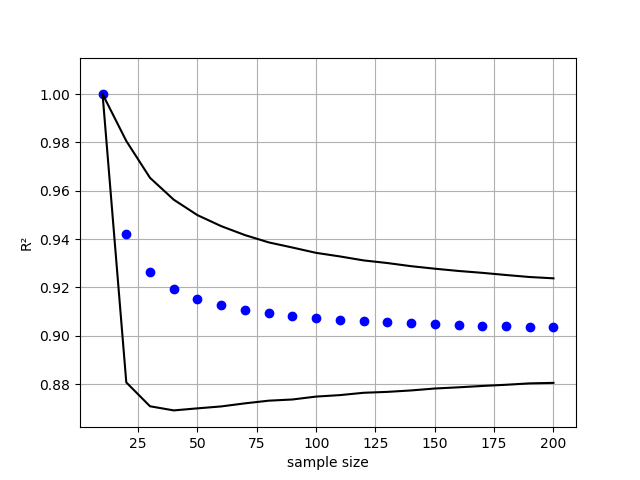